![Rhyme](https://rhyme.com/assets/img/logo-dark.png)

# Deep Learning Fundamentals - Logistic Regression

# Task 1: Introduction

In [1]:
import random
import numpy as np
import warnings
import helpers.plt, helpers.dataset
from matplotlib import pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

print('Libraries imported')

Libraries imported


# Task 2: Hyperparameters

In [2]:
lr = 0.3
batch_size = 300
iterations = 40

# Task 3: Dataset

In [3]:
(X_train, Y_train), (X_test, Y_test) =helpers.dataset.get_data()

Loading data..
Done.


In [4]:
print('Shape of X_train:', X_train.shape)
print('Shape of Y_train:', Y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of Y_test:', Y_test.shape)

Shape of X_train: (12665, 28, 28)
Shape of Y_train: (12665,)
Shape of X_test: (2115, 28, 28)
Shape of Y_test: (2115,)


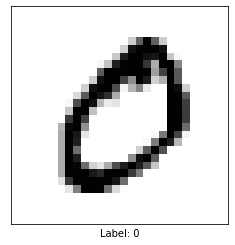

In [5]:
helpers.plt.show_example(X_train[0], Y_train[0])

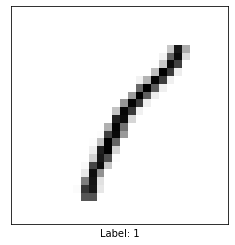

In [6]:
helpers.plt.show_example(X_train[-1],Y_train[-1])

# Task 4: A Mini Batch of Examples

X_batch Shape (1, 784)


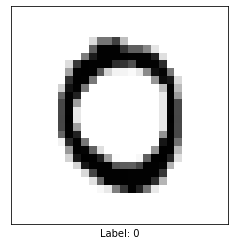

In [7]:
X_batch, Y_batch = helpers.dataset.get_random_batch(X_train, Y_train, 1)
print('X_batch Shape', X_batch.shape)
helpers.plt.show_example(X_batch[0], Y_batch[0])

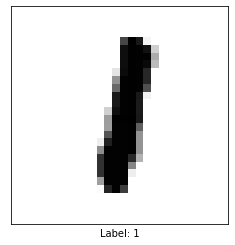

In [8]:
X_batch, Y_batch = helpers.dataset.get_random_batch(X_test, Y_test, 1)
helpers.plt.show_example(X_batch[0], Y_batch[0])

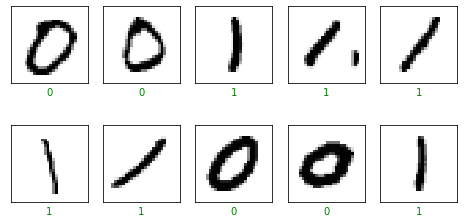

In [9]:
X_batch, Y_batch = helpers.dataset.get_random_batch(X_train, Y_train, 10)
helpers.plt.show_ten_examples(X_batch, Y_batch, Y_batch)

# Task 5: Create Model

A logistic model is simply a multi variable linear equation which gives a binary output. The pixel values of our input images are going to be the input features - the independent variables that form the logistic regression equation. And the class label - either 0 or 1 in our case, is the output y.

\begin{equation}
z = b + w_1x_1 + w_2x_2 + ... + w_N * x_N
\end{equation}

\begin{equation}
y = \sigma(z)
\end{equation}

To simplify, we can use vectorized represenation where X is the feature matrix and W is the weight matrix:

\begin{equation}
y = \sigma(W^T.X + b)
\end{equation}

In [10]:
class LogisticModel:
    def __init__(self, num_features):
        # Your code here
        self.W=np.reshape(np.random.randn((num_features)), (num_features,1 ))
        self.b=np.zeros((1,1))
        self.num_features =num_features
        self.losses=[]
        self.accuracies=[]
        
    def summary(self):
        print('=================================')
        print('Number of features:', self.num_features)
        print('Shape of weights:', self.W.shape)
        print('Shape of biases:', self.b.shape)
        print('=================================')
        
# Your code here
model=LogisticModel(num_features=784)
model.summary()

Number of features: 784
Shape of weights: (784, 1)
Shape of biases: (1, 1)


# Task 5: Forward Pass

For a single training example, the loss should be:

\begin{equation}
L(y, \hat{y}) = -(y * log(\hat{y}) + (1 - y) * log(1 - \hat{y}))
\end{equation}

In [20]:
class LogisticModel(LogisticModel):
    def _forward_pass(self, X, Y=None):
        # Your code here
        batch_size=X.shape[0]
        Z= np.dot(X, self.W) +self.b
        A =1./(1+np.exp(-Z))
        loss =float(1e6)
        if Y is not None:
            loss =-1*np.sum(np.dot(np.transpose(Y), np.log(A)) + \
                     np.matmul(np.transpose(1-Y), np.log(1-A)))
            loss /=batch_size
        return A, loss

# Task 6: Backward Pass

In [12]:
class LogisticModel(LogisticModel):
    def _backward_pass(self, A, X, Y):
        # Your code here
        batch_size = X.shape[0]
        dZ = A-Y
        dW=np.dot(np.transpose(X), dZ) / batch_size
        db=np.sum(dZ) / batch_size
        return dW, db

# Task 7: Update Parameters

In [13]:
class LogisticModel(LogisticModel):
    def _update_params(self, dW, db, lr):
        # Your code here
        self.W -= lr *dW
        self.b -= lr *db

# Task 8: Check Model Performance

In [17]:
class LogisticModel(LogisticModel):
    def predict(self, X, Y=None):
        # Your code here
        A, loss =self._forward_pass (X,Y)
        Y_hat =A>0.5
        return np.squeeze(Y_hat), loss
    
    def evaluate(self, X, Y):
        # Your code here
        Y_hat ,loss =self.predict(X,Y)
        accuracy =np.sum(Y_hat ==np.squeeze(Y)) /X.shape[0]
        return accuracy, loss

In [22]:
model = LogisticModel(784)
model.summary()
X, Y = helpers.dataset.get_random_batch(X_test, Y_test, batch_size)
acc, loss =model.evaluate(X, Y)
print('Untrained mode; accuracy: {}, loss: {}'.format(acc, loss))

Number of features: 784
Shape of weights: (784, 1)
Shape of biases: (1, 1)
Untrained mode; accuracy: 0.2633333333333333, loss: 4.3975221631705335


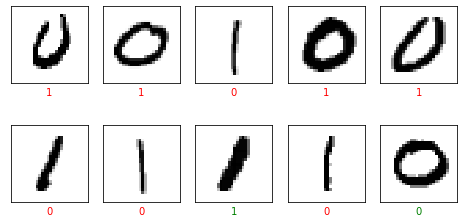

In [23]:
preds, _ = model.predict(X)
helpers.plt.show_ten_examples(X, Y, preds)

# Task 9: Training Loop

In [32]:
class LogisticModel(LogisticModel):
    def train(self, batch_size, get_batch, lr, iterations, X_train, Y_train, X_test, Y_test):
        # Your code here
        print('Training..')
        self.accuracies =[]
        self.losses =[]
        for i in range(iterations):
            X, Y =get_batch(X_train, Y_train, batch_size)
            A, _ =self._forward_pass(X,Y)
            dW,db =self._backward_pass(A, X, Y)
            self._update_params(dW, db, lr)
            
            X, Y = get_batch(X_test , Y_test, batch_size)
            val_acc, val_loss =self.evaluate(X,Y)
            self.accuracies.append(val_acc)
            self.losses.append(val_loss)
            
            print('Iter: {}, Val Acc:{:.3f}, Val Loss:{:.3f}'.format(i, val_acc, val_loss))
        print('Traing is finished')

# Task 10: Training the Model

In [33]:
model = LogisticModel(784)

X, Y =helpers.dataset.get_random_batch(X_test, Y_test, batch_size)
print('Before Training performance:', model.evaluate(X, Y))
model.train(
    batch_size,
    helpers.dataset.get_random_batch,
    lr,
    iterations,
    X_train, Y_train,
    X_test, Y_test
    
)
print('After Training performance:', model.evaluate(X, Y))

Before Training performance: (0.79, 0.6930897547120676)
Training..
Iter: 0, Val Acc:0.880, Val Loss:0.368
Iter: 1, Val Acc:0.897, Val Loss:0.331
Iter: 2, Val Acc:0.877, Val Loss:0.317
Iter: 3, Val Acc:0.890, Val Loss:0.313
Iter: 4, Val Acc:0.907, Val Loss:0.236
Iter: 5, Val Acc:0.910, Val Loss:0.290
Iter: 6, Val Acc:0.933, Val Loss:0.241
Iter: 7, Val Acc:0.933, Val Loss:0.206
Iter: 8, Val Acc:0.953, Val Loss:0.134
Iter: 9, Val Acc:0.923, Val Loss:0.197
Iter: 10, Val Acc:0.950, Val Loss:0.173
Iter: 11, Val Acc:0.960, Val Loss:0.133
Iter: 12, Val Acc:0.940, Val Loss:0.160
Iter: 13, Val Acc:0.930, Val Loss:0.137
Iter: 14, Val Acc:0.953, Val Loss:0.153
Iter: 15, Val Acc:0.967, Val Loss:0.087
Iter: 16, Val Acc:0.970, Val Loss:0.103
Iter: 17, Val Acc:0.960, Val Loss:0.081
Iter: 18, Val Acc:0.953, Val Loss:0.124
Iter: 19, Val Acc:0.950, Val Loss:0.119
Iter: 20, Val Acc:0.970, Val Loss:0.079
Iter: 21, Val Acc:0.973, Val Loss:0.061
Iter: 22, Val Acc:0.950, Val Loss:0.112
Iter: 23, Val Acc:0.983

# Task 11: Display the Results

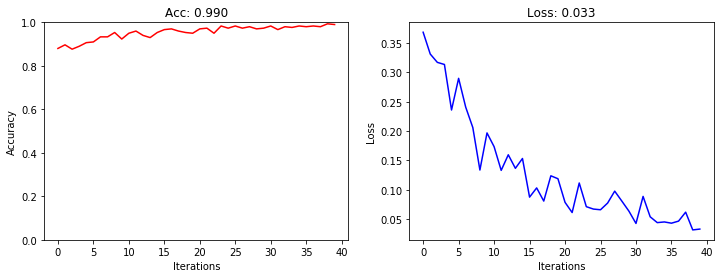

In [35]:
helpers.plt.plot_metrics(model)

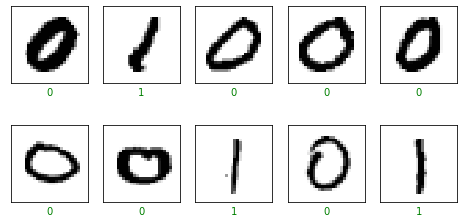

In [37]:
preds, _ =model.predict(X, Y)
helpers.plt.show_ten_examples(X, Y, preds)